### CASE STUDY ON UNSUPERVISED LEARNING

The Whole sale customer data is given
1. Read the dataset to the python environment.
2. Try out different clustering models in the Whole sale customer dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.
4. Perform PCA for Dimensionality reduction.

#### LOAD DATASET

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [284]:
data=pd.read_csv('Wholesale customers data.csv')

In [285]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### DATA ANALYSIS

In [286]:
data.shape

(440, 8)

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [288]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [289]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### CHECKING FOR NULL VALUES

In [290]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<AxesSubplot:>

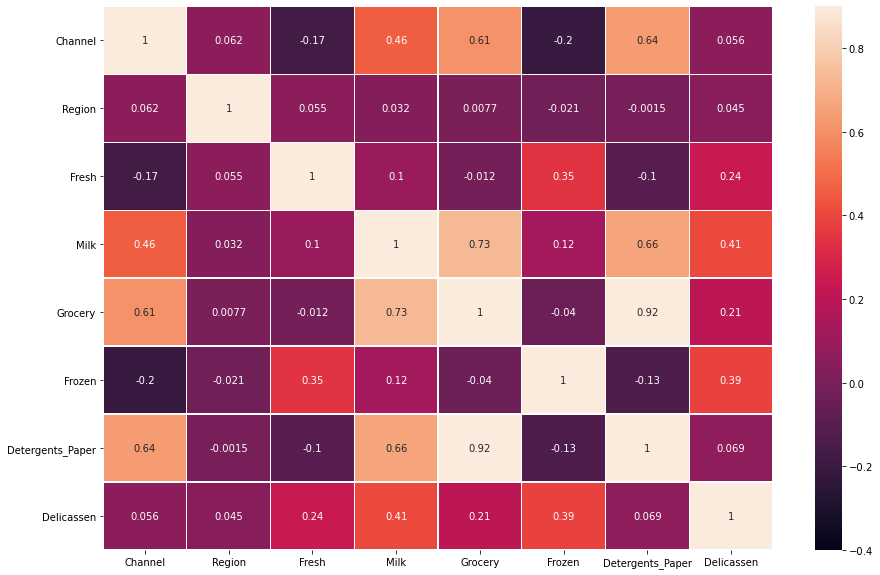

In [291]:
corr=data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,vmin=-0.4 , vmax=0.9, annot=True, linewidth=0.2)

In [292]:
data.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

###### Dropping less significant columns

In [293]:
data=data.drop(['Channel','Region'],axis=1)

#### NORMALIZATION

In [294]:
from sklearn import preprocessing
norm=preprocessing.Normalizer()
x=norm.fit_transform(data)
x= pd.DataFrame(x)
x.head()


,0,1,2,3,4,5
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


### CLUSTERING MODELS

#### K-MEANS CLUSTERING

133.6628671210968
58.21273260099294
45.937198696591246
36.926791848947836
30.634726518881173
26.95179985240264
24.222999435704317


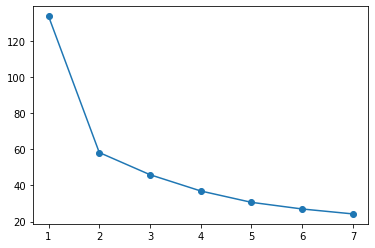

In [295]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,8):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1,8),wcss,'o-')

###### From the above graph we get optimum number of clusters as 2

In [296]:
km=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_out=km.fit_predict(x)

In [297]:

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.5002248259665941
For n_clusters = 3 The average silhouette_score is : 0.4478262043812748
For n_clusters = 4 The average silhouette_score is : 0.39166082393550544
For n_clusters = 5 The average silhouette_score is : 0.3751669283882132
For n_clusters = 6 The average silhouette_score is : 0.3655263341588539


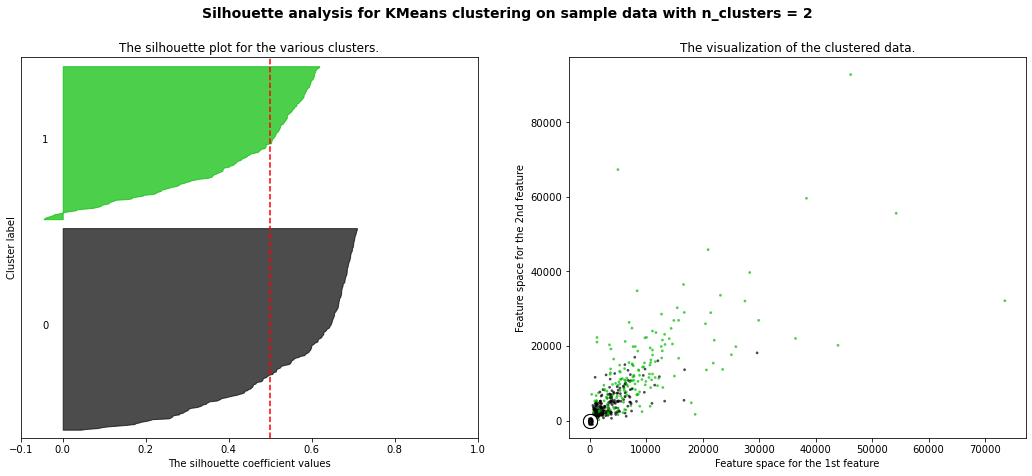

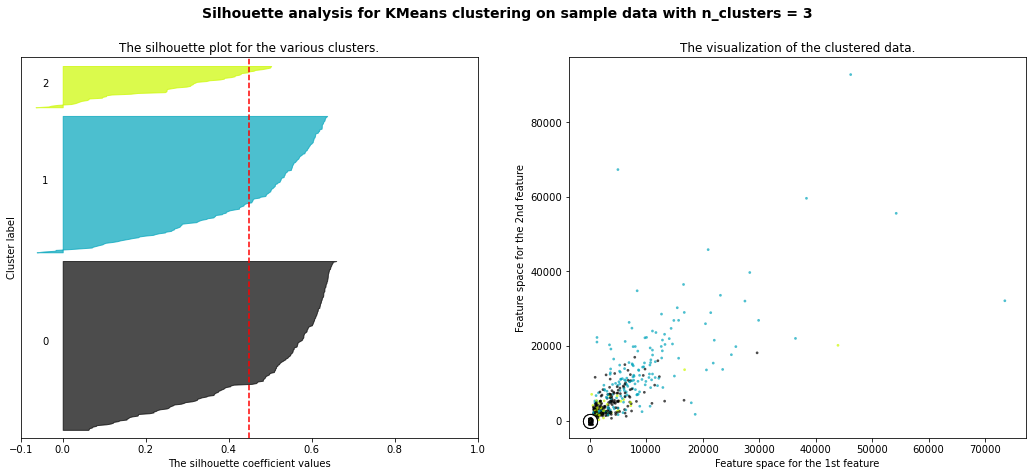

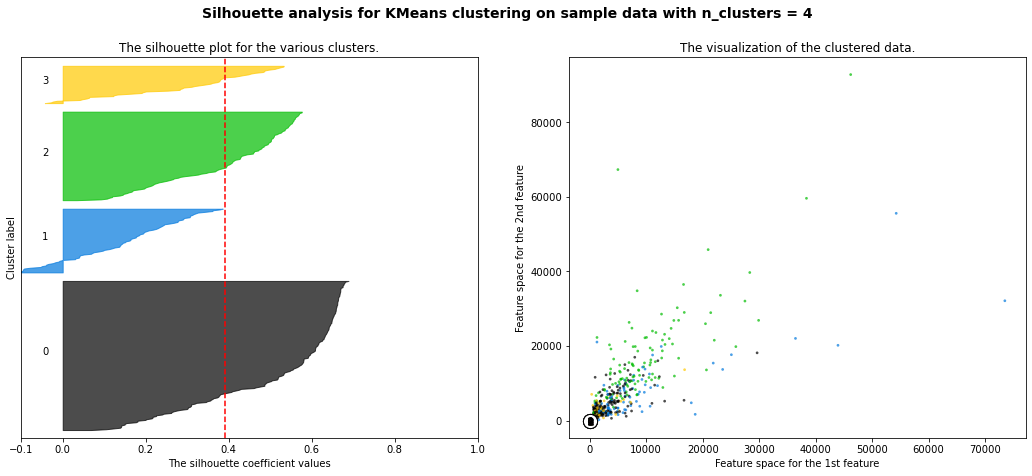

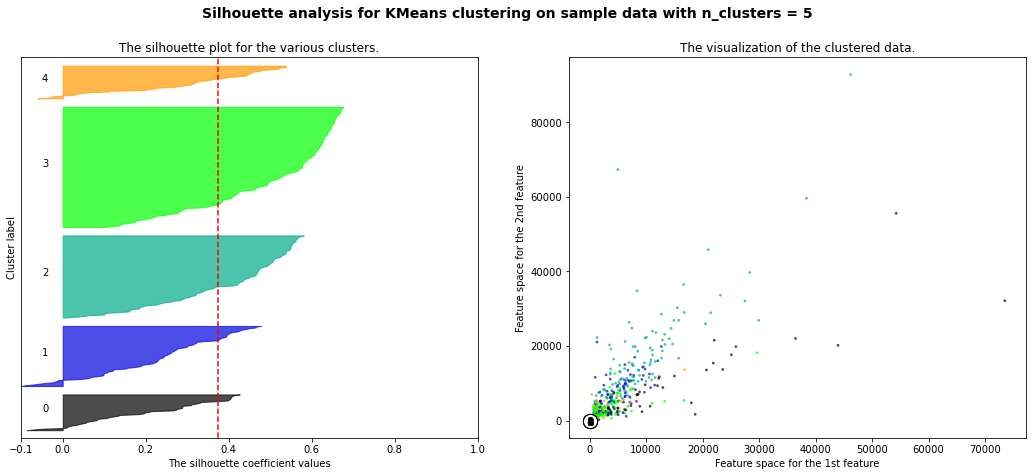

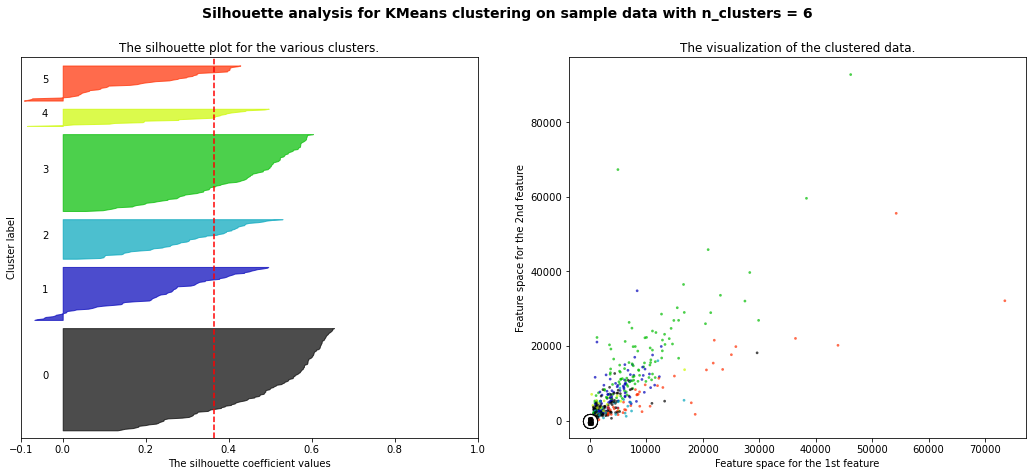

In [298]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data.iloc[:,1].values, data.iloc[:,2].values, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

###### While checking the silhouette score ,we got higher score for n=2.So our clustering is correct

#### PLOTTING CLUSTERS FORMED BY K-MEANS

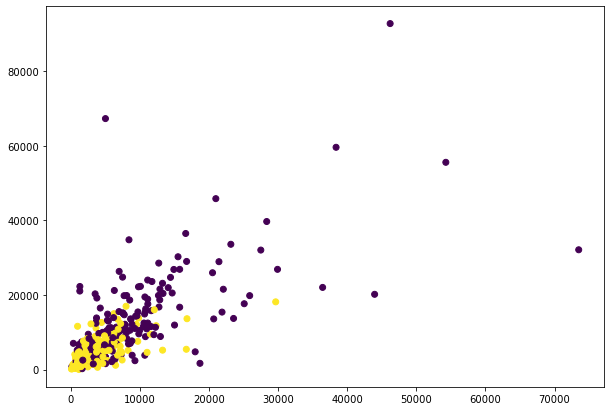

In [299]:

plt.figure(figsize=(10, 7))  
plt.scatter(data['Milk'], data['Grocery'], c=y_out) 

#### AGGLOMERATIVE HIERARCHICAL CLUSTERING(AHC)

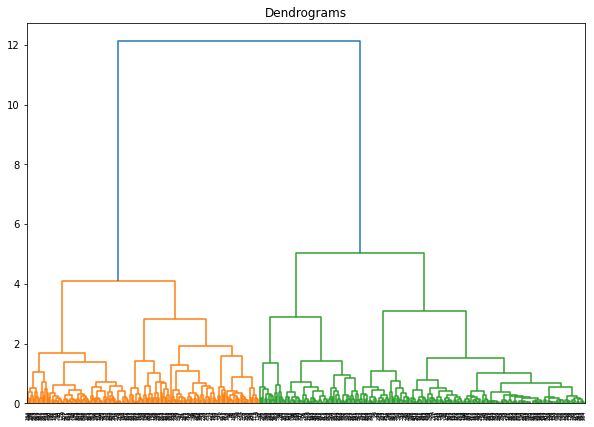

In [300]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))

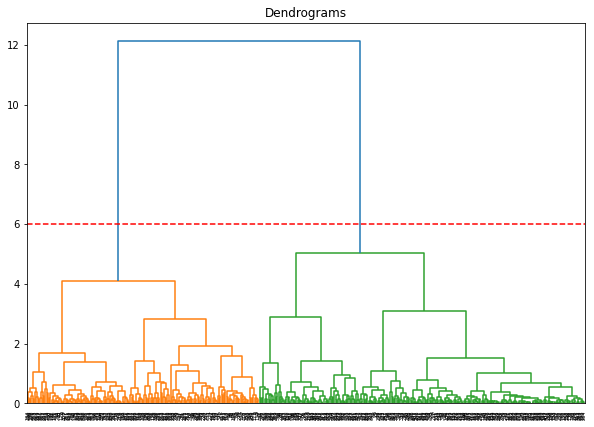

In [301]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

###### From the above dendrogram, we got number of clusters=2

In [302]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred=cluster.fit_predict(x)

#### PLOTTING THE CLUSTERS THROUGH AHC

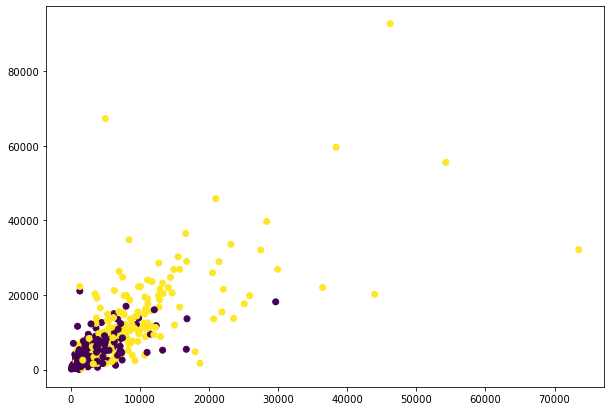

In [303]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['Milk'], data['Grocery'], c=y_pred) 

#### PRINCIPAL COMPONENT ANALYSIS(PCA)

In [304]:
from sklearn.decomposition import PCA
pca=PCA(.95)
pca.fit(x)
x_pca=pca.transform(x)


In [305]:
x_pca.shape

(440, 4)

###### Here we got 4 principal components

In [306]:
x_pca=pd.DataFrame(x_pca)

In [307]:
x_pca

,0,1,2,3
0,0.034037,-0.180421,0.229754,-0.013550
1,0.351057,-0.046644,0.180286,-0.042871
2,0.305375,0.055551,0.221512,-0.124731
3,-0.383677,0.161789,-0.137268,-0.063972
4,-0.318591,-0.076970,0.031286,-0.084619
...,...,...,...,...
435,-0.166266,0.106042,0.010358,-0.125688
436,-0.607490,-0.097158,-0.008438,0.083289
437,0.464837,-0.191884,-0.108976,0.031410
438,-0.412001,-0.120676,0.059065,-0.069533


#### K-MEANS CLUSTERING USING PCA COMPONENTS

127.98627281445958
52.54472075803501
40.308790399642135
31.41963872484683
25.661243878255096
22.20865658453812
19.731406093275197


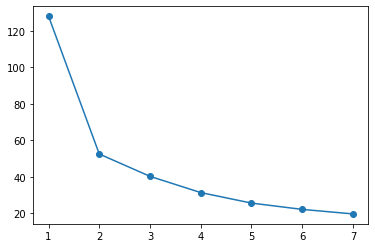

In [308]:
wcss=[]
for i in range(1,8):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(x_pca)
    wcss.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1,8),wcss,'o-')

In [309]:
km=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_out1=km.fit_predict(x_pca)

#### PLOTTING THE CLUSTERS FORRMED BY K-MEANS USING PRINCIPAL COMPONENTS

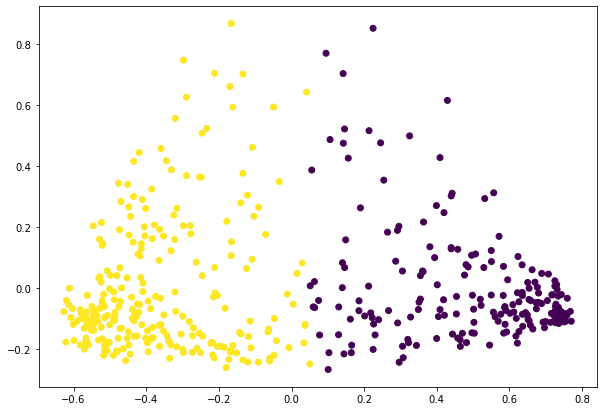

In [310]:
plt.figure(figsize=(10, 7))  
plt.scatter(x_pca[0], x_pca[1], c=y_out1) 

#### AHC USING PRINCIPAL COMPONENTS

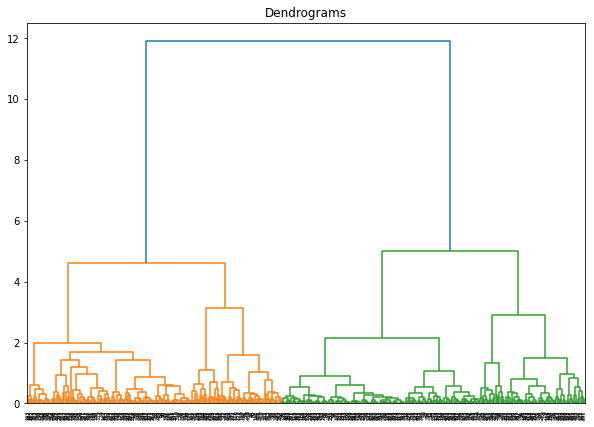

In [311]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))

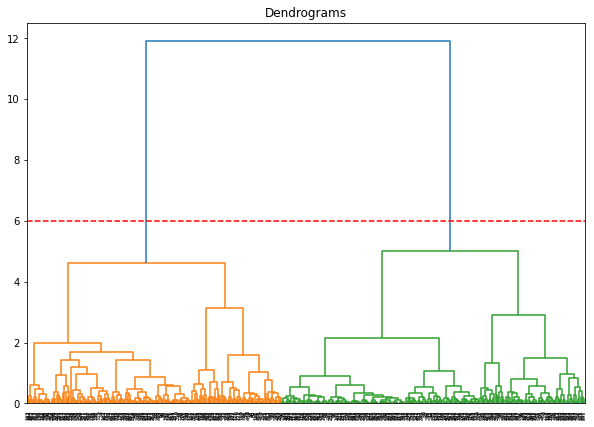

In [312]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [313]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred1=cluster.fit_predict(x_pca)

#### PLOTTING THE CLUSTERS FORRMED BY AHC USING PRINCIPAL COMPONENTS

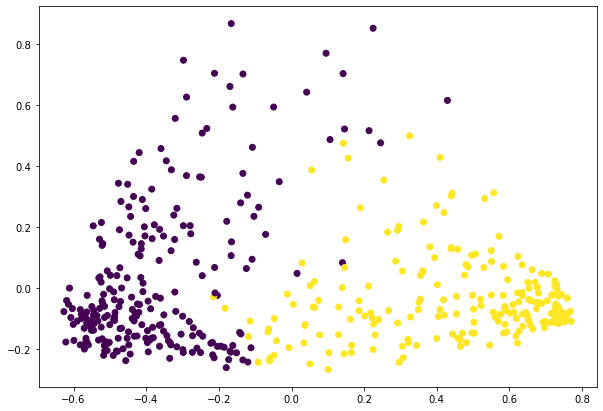

In [314]:
plt.figure(figsize=(10, 7))  
plt.scatter(x_pca[0], x_pca[1], c=y_pred1) 